# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np
import math
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import matplotlib.pyplot as plt
from HouseholdSpecializationModel import HouseholdSpecializationModelClass as HHModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

We use the code with defintions provided in the python-file "HouseholdSpecializationModel" in order to solve the model in the case where the parameter $\sigma=1$, making household consumption a Cobb-Douglas function. 

For this particular question, we are interested in the relationship between the hours worked at home for the female member and the male member of the household, namely $\frac{H_F}{H_M}$ and how it changes for different values of $\alpha$ and $\sigma$.

In order to investigate this, we make two arrays of the specified parameter values, and call the model solving process from the python-file so it loops for the $\alpha$ and $\sigma$ values in the arrays, thus creating nine values for the ratio of the hours worked at home. We then illustrate these results by creating a plot for each of the three $\sigma$ values.

Alpha = 0.25, Sigma = 0.5, HF/HM = 0.55
Alpha = 0.5, Sigma = 0.5, HF/HM = 1.00
Alpha = 0.75, Sigma = 0.5, HF/HM = 1.83
Alpha = 0.25, Sigma = 1.0, HF/HM = 0.31
Alpha = 0.5, Sigma = 1.0, HF/HM = 1.00
Alpha = 0.75, Sigma = 1.0, HF/HM = 3.25
Alpha = 0.25, Sigma = 1.5, HF/HM = 0.21
Alpha = 0.5, Sigma = 1.5, HF/HM = 1.00
Alpha = 0.75, Sigma = 1.5, HF/HM = 4.67


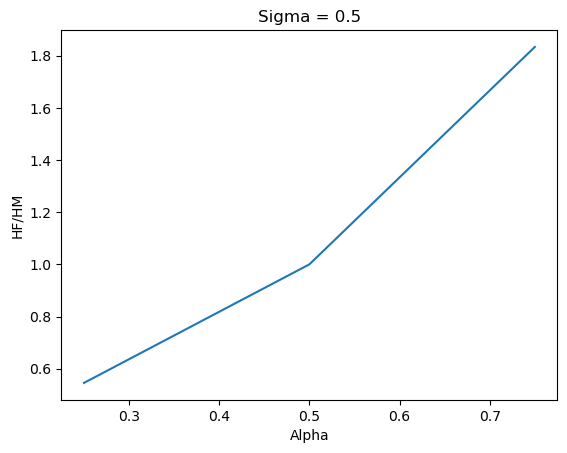

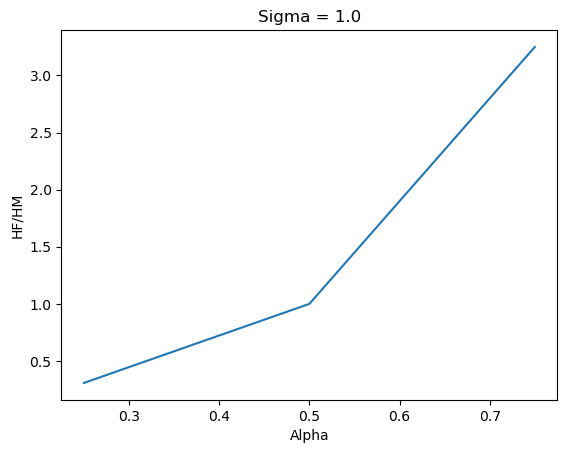

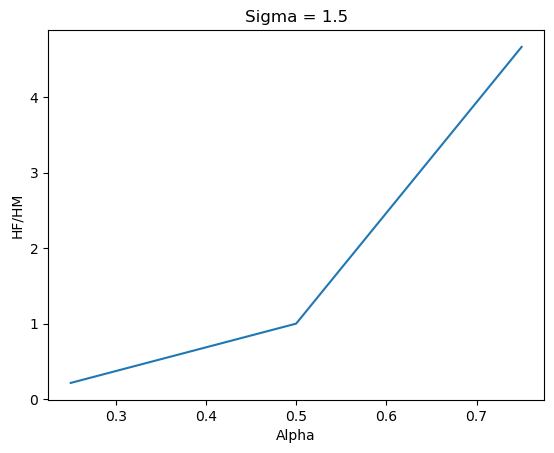

In [4]:
# Make arrays of alpha and sigma parameters
alphas = np.array([0.25, 0.5, 0.75])
sigmas = np.array([0.5, 1.0, 1.5])

# Make array of the ratio between HF and HM and filling it with zeros
HFactor = np.zeros(9)

# Make array for the alphas and filling it with zeros
A = np.zeros(9)

# Make an instance of the household model class
HH = HHModel()

# Loop over sigmas and alphas 
i = 0
for sigma in sigmas:
    for alpha in alphas:
        HH.par.alpha = alpha
        HH.par.sigma = sigma
        result = HH.solve_discrete() # Call the discrete solve method
        HFactor[i] = result.HF/result.HM # Calculate home work ratio for male and female
        A[i] = alpha # Save alpha value for the plots
        print(f"Alpha = {alpha}, Sigma = {sigma}, HF/HM = {HFactor[i]:.2f}") # Print the input and result
        i += 1

# Create three plots showing how the home work ratio varies with alpha for the different sigma values
plt.figure()
plt.plot(A[0:3],HFactor[0:3])
plt.xlabel("Alpha")
plt.ylabel("HF/HM")
plt.title("Sigma = 0.5")
plt.show()


plt.figure()
plt.plot(A[3:6],HFactor[3:6])
plt.xlabel("Alpha")
plt.ylabel("HF/HM")
plt.title("Sigma = 1.0")
plt.show()


plt.figure()
plt.plot(A[6:9],HFactor[6:9])
plt.xlabel("Alpha")
plt.ylabel("HF/HM")
plt.title("Sigma = 1.5")
plt.show()
# The plot does slightly change for the different sigma values, and therefore we can 
# conclude that the work at home ratio varies with alpha to a bigger degree than sigma

From these results it becomes apparent, that the ratio of hours worked at home by the female member relative to the male member increases drastically as $\alpha$ increases, which comes from the nature of the household consumption function. The parameter $\alpha$ can be interpreted as a measure of how productive the female member of the household is at these at-home work activities such as cleaning and cooking. It therefore makes sense, that it would be optimal for the household to have a greater share of these activities completed by the female, as the male member's time is would be wasted on this, if $\alpha$ is large. And if they are equally productive ($\alpha=0.5$), the optimal amount of hours worked at home will be the exact same $\left(\Rightarrow \frac{H_F}{H_M}=1\right)$.

The three plots are quite similar, however as the size of $\sigma$ increases, the kink in the curve becomes more significant. The explanation is again found in the household consumption, where the parameter $\sigma$ will further amplify the allocation of hours worked at home given the productivity.

# Question 2

Explain your code and procedure

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156] [ 0.22314355  0.          0.         -0.11778304 -0.22314355]


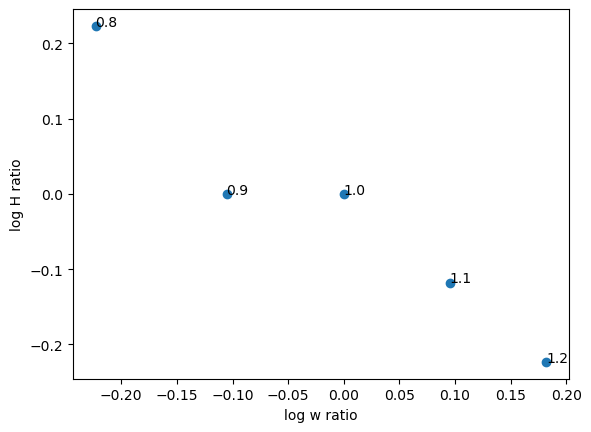

In [5]:
# Make an array of w_F
wages_f = np.array([0.8,0.9,1.0,1.1,1.2])

# Make arrays of log(wF/wM) and log(HF/HM) and filling it with zeros
logw_ratio = np.zeros(5)
logH_ratio = np.zeros(5)

# Create new instance of the household model class
HH2 = HHModel()

# Loop over wF
for i, wage_f in enumerate(wages_f): 
    HH2.par.wF = wage_f
    result = HH2.solve_discrete() # Call the discrete solve method
    logw_ratio[i] = math.log(wage_f / HH2.par.wM) # Calculate log(wF/wM)
    logH_ratio[i] = math.log(result.HF/result.HM) # Calculate log(HF/HM)
print(logw_ratio,logH_ratio) 

plt.scatter(logw_ratio,logH_ratio) # Make a scatter plot 
plt.xlabel("log w ratio")
plt.ylabel("log H ratio")
for i, txt in enumerate(wages_f):
    plt.annotate(txt, (logw_ratio[i], logH_ratio[i])) # Annotate each data point with the corresponding value of wF
plt.show()

# Question 3

Explain your code and procedure

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156] [ 2.23153273e-01  1.05368268e-01  5.89691763e-06 -9.53086198e-02
 -1.82307387e-01]


/Users/mariusmouritzen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


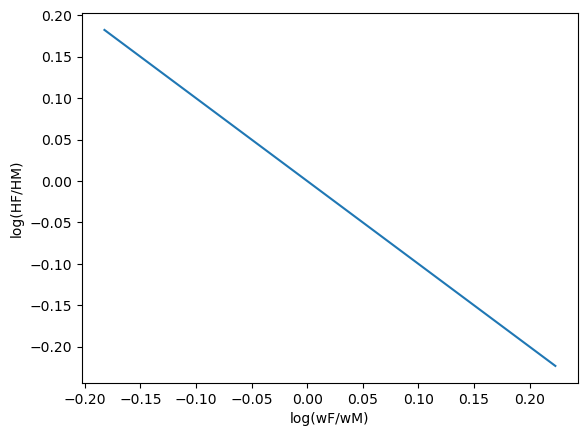

In [6]:
# Make new instance of the household model
HH3 = HHModel()

# Loop over wage_f
for i, wage_f in enumerate(wages_f): 
    HH3.par.wF = wage_f
    result = HH3.solve() # Call the solve method for continous model
    logw_ratio[i] = math.log(wage_f / HH3.par.wM) # Calculate log(wF/wM)
    logH_ratio[i] = math.log(result.HF/result.HM) # Calculate log(HF/HM)
print(logw_ratio,logH_ratio) 

# Plot the result
plt.plot(logH_ratio, logw_ratio)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()


# Question 4

# Question 5

ADD CONCISE CONLUSION.